In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('placement.csv')

In [8]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


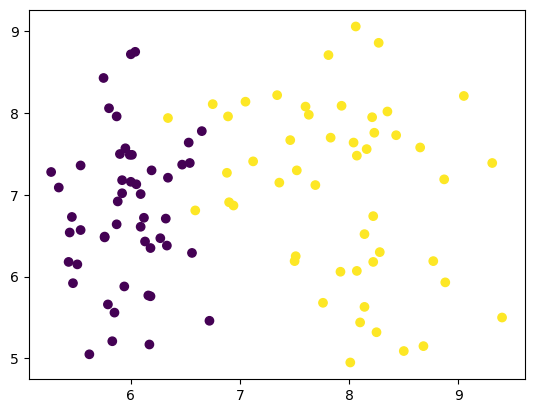

In [9]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.layers import BatchNormalization

In [12]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.5094 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6931
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4625 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6931
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4898 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6931
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4820 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5258 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5375 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4750 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4828 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss

In [15]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(3,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.5297 - loss: 0.6572 - val_accuracy: 0.4500 - val_loss: 0.7410
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6422 - loss: 0.6240 - val_accuracy: 0.4500 - val_loss: 0.7370
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6977 - loss: 0.6043 - val_accuracy: 0.4500 - val_loss: 0.7335
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7195 - loss: 0.6020 - val_accuracy: 0.4500 - val_loss: 0.7302
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7312 - loss: 0.5826 - val_accuracy: 0.4500 - val_loss: 0.7269
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6977 - loss: 0.5888 - val_accuracy: 0.4500 - val_loss: 0.7238
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7414 - loss: 0.5610 - val_accuracy: 0.4500 - val_loss: 0.7207
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7063 - loss: 0.6038 - val_accuracy: 0.4500 - val_loss

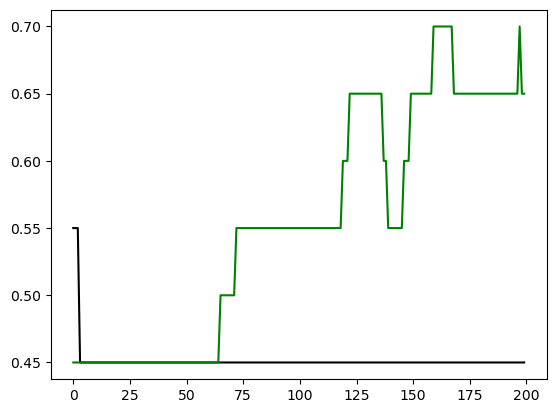

In [18]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')